Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

CmdStan uses a tmp directory to store the output of cmdstan

In [3]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

In [4]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


### Snippet 4.21

Sample 20 random heights

In [5]:
n = size(df2, 1)
selected_ind = sample(1:n, 20, replace=false);
df3 = df2[selected_ind, :];

### Snippet 4.22

Generate approximate probabilities

In [6]:
struct Post
  mu::Float64
  sigma::Float64
  ll:: Float64
  prod::Float64
  prob::Float64
end

mu_list = repeat(range(140, 170, length=200), 200);
sigma_list = repeat(range(4, 20, length=200), inner=200);

ll = zeros(40000);
for i in 1:40000
    d1 = Normal(mu_list[i], sigma_list[i])
    ll[i] = sum(log.(pdf.(d1, df3[:height])))
end

d2 = Normal(178.0, 20.0)
d3 = Uniform(0, 50)
prod = ll + log.(pdf.(d2, mu_list)) + log.(pdf.(d3, sigma_list))
prob = exp.(prod .- maximum(prod))
post = DataFrame(mu=mu_list, sigma=sigma_list, ll=ll, prod=prod, prob=prob)
first(post, 10)

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,140.0,4.0,-203.704,-213.335,1.65326e-59
2,140.151,4.0,-201.11,-210.728,2.24308e-58
3,140.302,4.0,-198.545,-208.149,2.95791e-57
4,140.452,4.0,-196.009,-205.598,3.79108e-56
5,140.603,4.0,-193.501,-203.075,4.72258e-55
6,140.754,4.0,-191.021,-200.582,5.71786e-54
7,140.905,4.0,-188.57,-198.116,6.72861e-53
8,141.055,4.0,-186.147,-195.679,7.69581e-52
9,141.206,4.0,-183.752,-193.271,8.55503e-51


Sample post

In [7]:
samples = post[sample(1:size(post, 1), Weights(post[:prob]), 10000, replace=true), :]

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,154.472,7.8593,-69.5014,-78.0201,0.966183
2,152.211,8.74372,-70.0283,-78.6863,0.496266
3,151.005,9.14573,-70.8581,-79.5957,0.199879
4,155.075,7.9397,-69.6848,-78.1685,0.832932
5,151.759,8.50251,-70.1772,-78.8646,0.415197
6,154.925,8.34171,-69.6941,-78.1863,0.818161
7,153.266,6.57286,-70.1584,-78.7498,0.465748
8,152.814,6.65327,-70.2253,-78.8449,0.423491
9,153.869,9.30653,-69.999,-78.5536,0.566706


### Snippet 4.23

Density of sigma

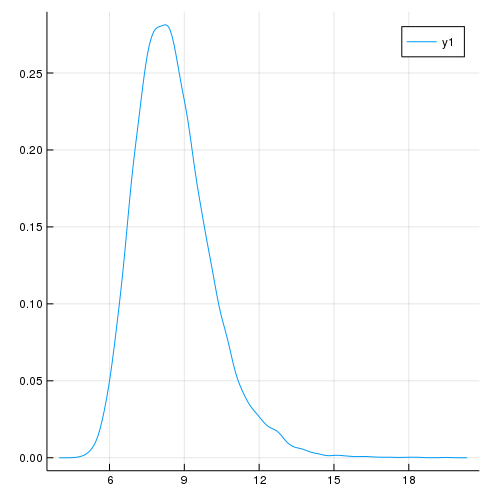

In [8]:
density(samples[:sigma])

End of `clip-21-23.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*